# Exploratory data analysis:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer 
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import sys
print("Python: {}".format(sys.version))
import numpy as np
print("Numpy: {}".format(np.__version__))
import pandas as pd
print("Pandas: {}".format(pd.__version__))
import matplotlib 
print("Matplotlib: {}".format(matplotlib.__version__))
import seaborn as sns
print("Seaborn: {}".format(sns.__version__))
import statsmodels.api as sm
print("Statsmodels.api: {}".format(sm.__version__))

Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Numpy: 1.16.5
Pandas: 0.25.1
Matplotlib: 3.1.1
Seaborn: 0.9.0
Statsmodels.api: 0.10.1


In [3]:
data = pd.read_excel(r'Data_Train.xlsx')

### Data Pre-Processing:



In [4]:
data.shape

(6019, 12)

In [5]:
cities=pd.Series(data.Location.unique())
cities

0         Mumbai
1           Pune
2        Chennai
3     Coimbatore
4      Hyderabad
5         Jaipur
6          Kochi
7        Kolkata
8          Delhi
9      Bangalore
10     Ahmedabad
dtype: object

In [6]:
year=data.Year.nunique()
year

22

In [7]:
fuel_type=pd.Series(data.Fuel_Type.unique())
fuel_type

0         CNG
1      Diesel
2      Petrol
3         LPG
4    Electric
dtype: object

In [8]:
owner=pd.Series(data.Owner_Type.unique())
owner

0             First
1            Second
2    Fourth & Above
3             Third
dtype: object

In [9]:
trans=pd.Series(data.Transmission.unique())
trans

0       Manual
1    Automatic
dtype: object

## Handling of missing values:

In [10]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [11]:
data=data.dropna()

In [12]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

## Data Types:

In [13]:
print(data.describe())
print(data.head())

              Year  Kilometers_Driven        Seats        Price
count  5975.000000       5.975000e+03  5975.000000  5975.000000
mean   2013.386778       5.867431e+04     5.278828     9.501647
std       3.247238       9.155851e+04     0.808959    11.205736
min    1998.000000       1.710000e+02     0.000000     0.440000
25%    2012.000000       3.390800e+04     5.000000     3.500000
50%    2014.000000       5.300000e+04     5.000000     5.650000
75%    2016.000000       7.300000e+04     5.000000     9.950000
max    2019.000000       6.500000e+06    10.000000   160.000000
                               Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbat

In [14]:
col=data.columns.tolist()
col

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price']

In [15]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

'Mileage', 'Engine', 'Power' are certain labels that must be converted to numeric data type like for int or float for better predictions. Thus, we convert them into float data type.

In [16]:
temp = data["Name"].str.split(" ", n = 1, expand = True)
data['Brand']=temp[0]
data['Model']=temp[1]
data['Engine']=data.Engine.str.split(" ").str[0]
data['Power']=data.Power.str.split(" ").str[0]
data['Mileage']=data.Mileage.str.split(" ").str[0]
data['Year']=np.subtract(2020,data['Year'])
data.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,10,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,5,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,9,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,8,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,7,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


In [17]:
data['Power'].replace('null ',float('NaN'),inplace=True)
data['Power'].replace('null',float('NaN'),inplace=True)
data.dropna(subset=['Mileage','Power','Engine','Seats'],inplace=True)

print(data.isnull().sum())

data.drop(columns=['Name'],inplace=True)

data.dropna(how="all",inplace=True)
data['Power']=data['Power'].astype(float)
data['Mileage']=data['Mileage'].astype(float)
data['Engine']=data['Engine'].astype(float)
data['Year']=data['Year'].astype(float)
data['Kilometers_Driven']=data['Kilometers_Driven'].astype(float)



data.dtypes

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
dtype: int64


Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Brand                 object
Model                 object
dtype: object

## Handling redundant data:

In [18]:
data.duplicated().sum()

0

**The data doesn't have duplicated values.**

## Handling outliers:

Detecting Outliers:<br>
Q1 = data.quantile(0.25)<br>
Q3 = data.quantile(0.75)<br>
IQR = Q3 - Q1<br>


In [19]:
col=['Year','Mileage','Engine','Power','Kilometers_Driven','Price']
for i in col:
    Q1 = data['{}'.format(i)].quantile(0.25)
    Q3 = data['{}'.format(i)].quantile(0.75)
    IQR = Q3 - Q1
    m1=Q1 - (1.5 * IQR)
    m2=Q3 + (1.5 * IQR)
    k2=data.loc[data['{}'.format(i)]>=m2, '{}'.format(i)].median()
    k1=data.loc[data['{}'.format(i)]<=m1, '{}'.format(i)].median()
    data.loc[data['{}'.format(i)]>=m2, '{}'.format(i)]=k2
    data.loc[data['{}'.format(i)]<=m1, '{}'.format(i)]=k1

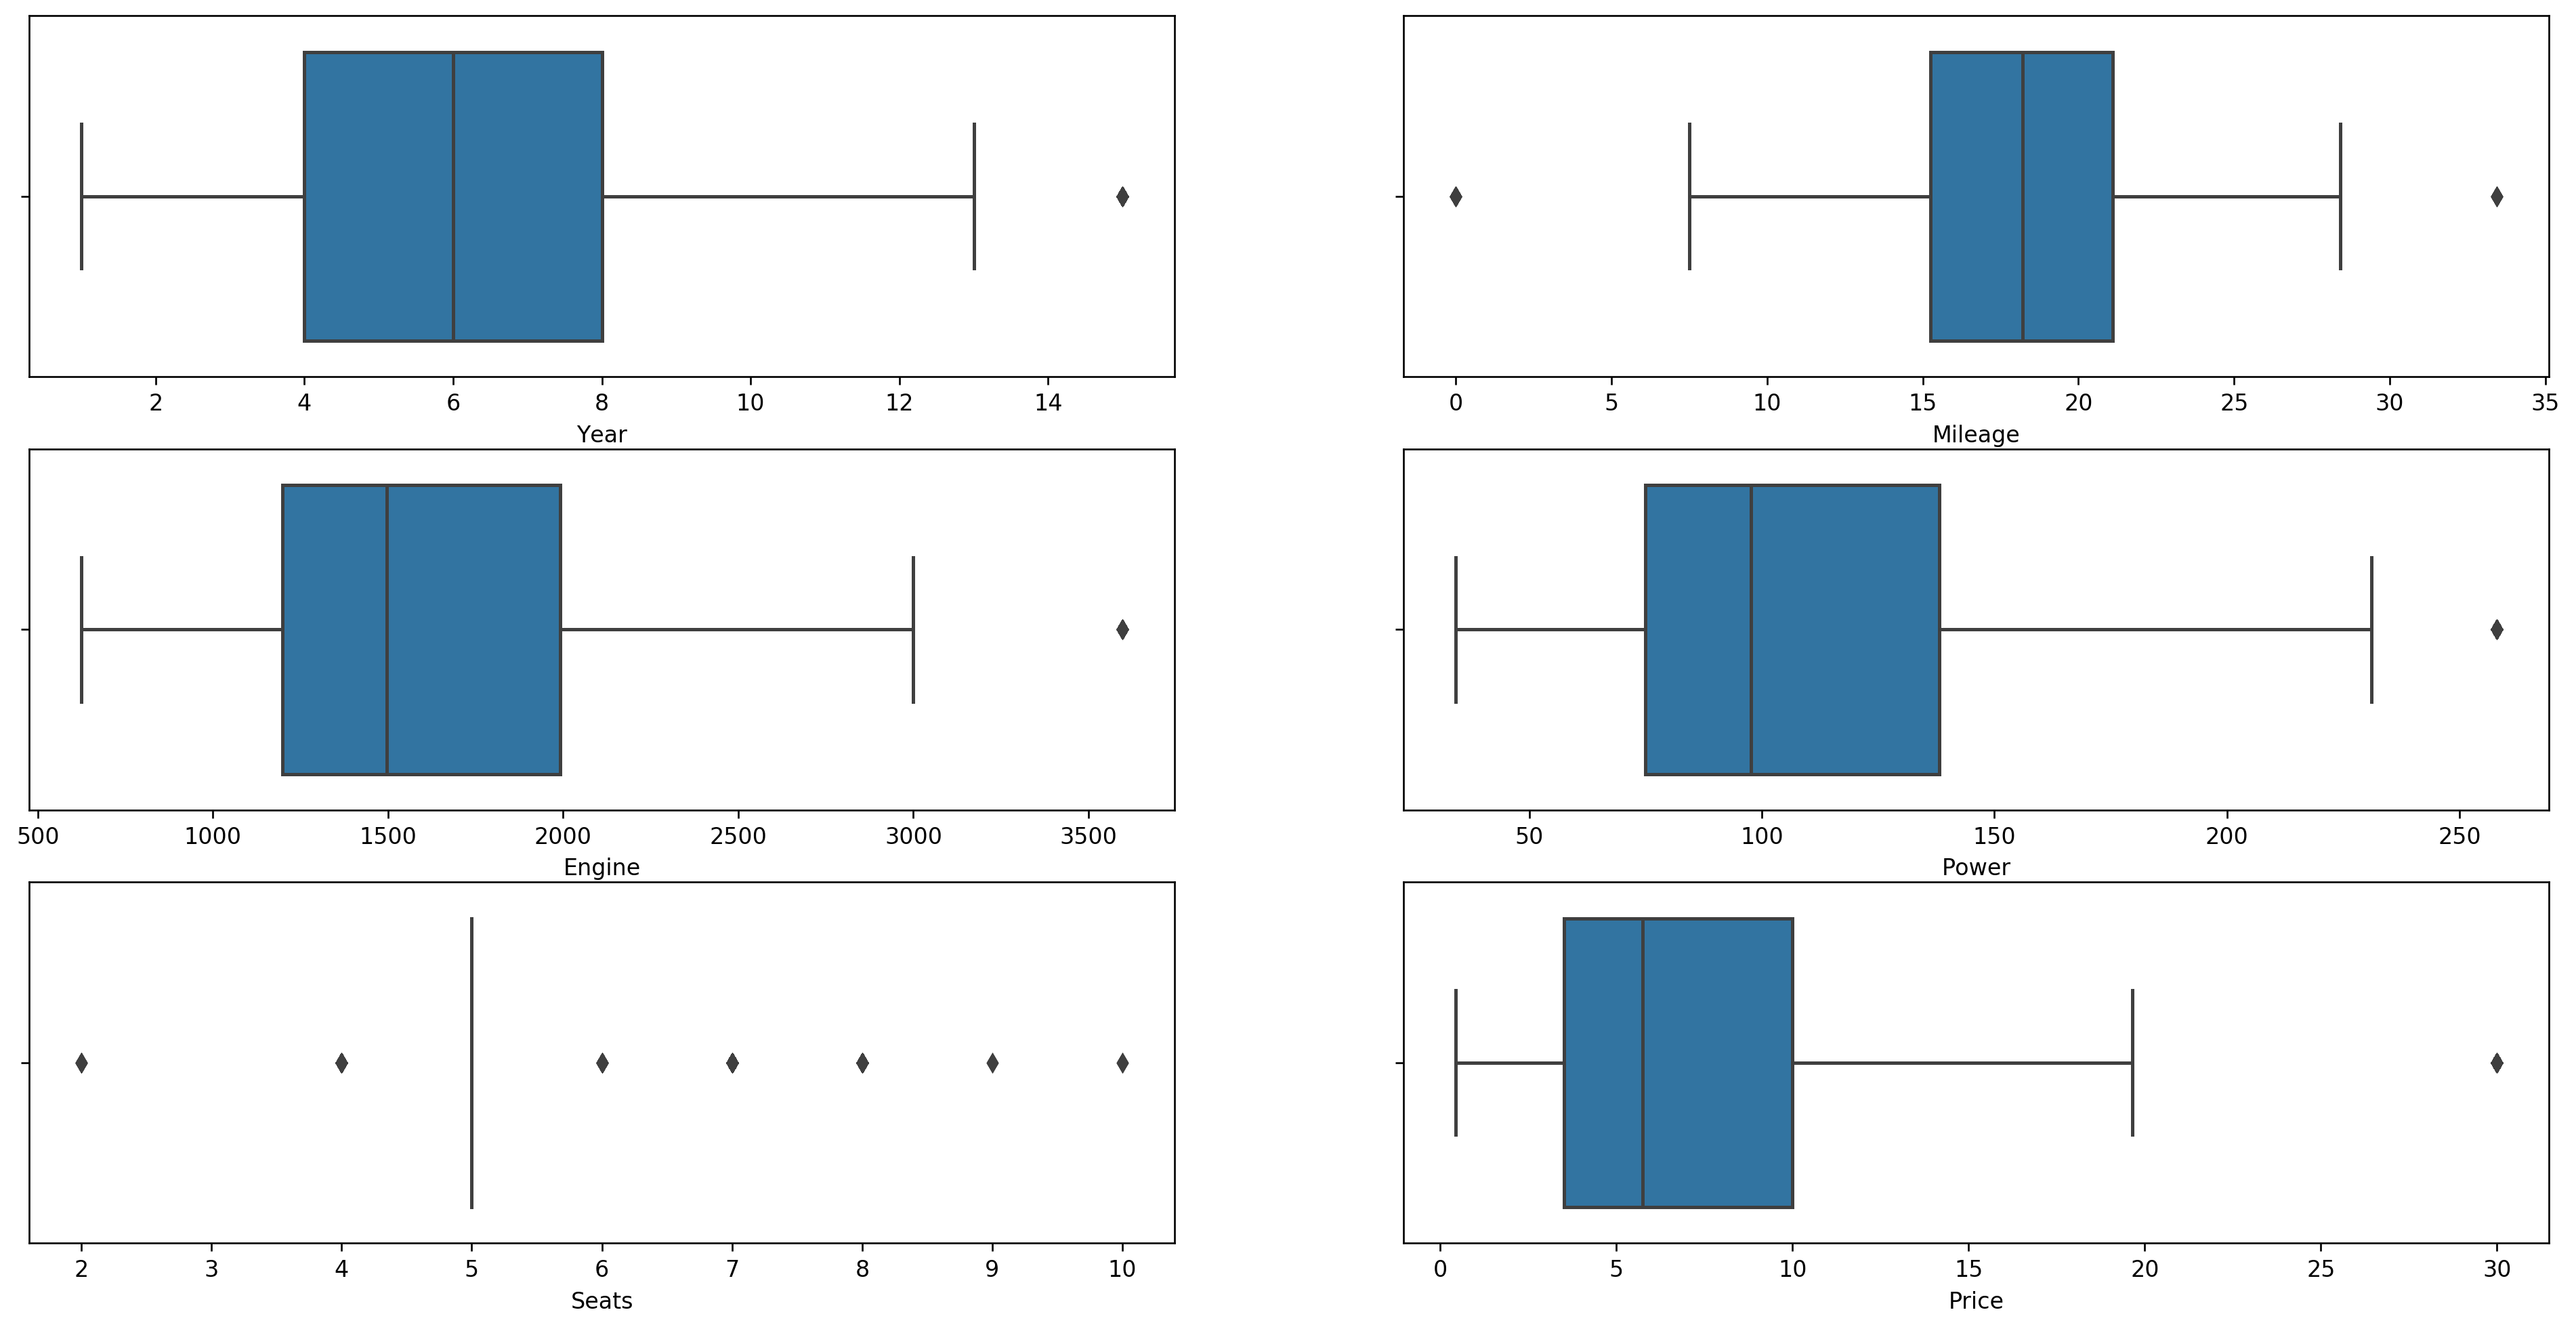

In [20]:
plt.figure(figsize=(20,10),dpi=240)
plt.subplot(3,2,1)
sns.boxplot(data["Year"])
plt.subplot(3,2,2)
sns.boxplot(data['Mileage'])
plt.subplot(3,2,3)
sns.boxplot(data['Engine'])
plt.subplot(3,2,4)
sns.boxplot(data['Power'])
plt.subplot(3,2,5)
sns.boxplot(data['Seats'])
plt.subplot(3,2,6)
sns.boxplot(data['Price'])
plt.show()

## Graphical Analysis:

**First, analysis of how each column affects the final price**

In [21]:
data.groupby("Year").size()

Year
1.0     102
2.0     298
3.0     586
4.0     737
5.0     740
6.0     794
7.0     639
8.0     562
9.0     452
10.0    333
11.0    191
12.0    162
13.0    105
15.0    171
dtype: int64

In [22]:
print(data["Kilometers_Driven"].max())
print(data["Seats"].max())
print(data["Price"].max())
print(data["Year"].max())
print(data["Year"].min())

153000.0
10.0
29.994999999999997
15.0
1.0


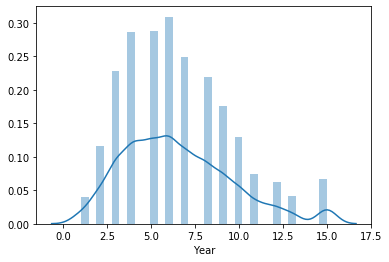

In [23]:
sns.distplot(data["Year"])

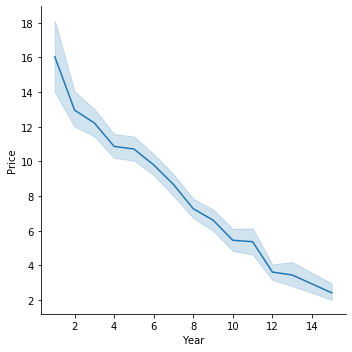

In [24]:
 sns.relplot(x="Year", y="Price", kind="line", data=data)


**Though the curve is not perfectly linear, it can be seen that when the car is new (bought in recent years), it has higher market value.**<br><br>

In [25]:
data.groupby("Fuel_Type").size()

Fuel_Type
CNG         55
Diesel    3152
LPG         10
Petrol    2655
dtype: int64

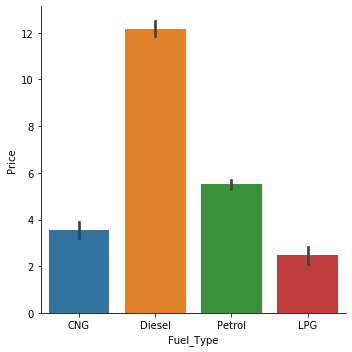

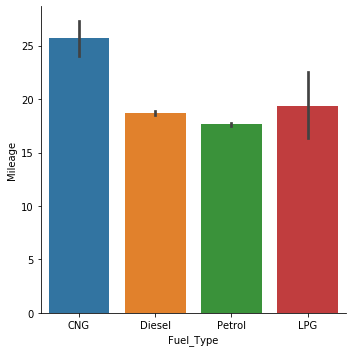

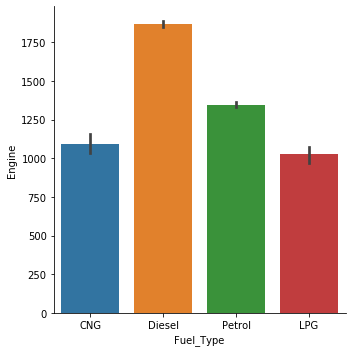

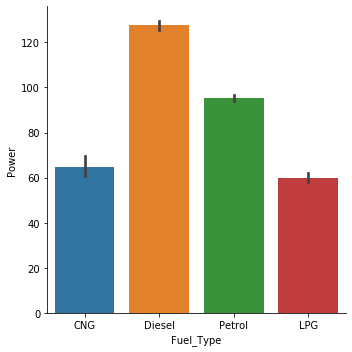

In [26]:
a=sns.catplot(x="Fuel_Type", y="Price", kind="bar", data=data)
b=sns.catplot(x="Fuel_Type", y="Mileage", kind="bar", data=data)
c=sns.catplot(x="Fuel_Type", y="Engine", kind="bar", data=data)
d=sns.catplot(x="Fuel_Type", y="Power", kind="bar", data=data)

**The above graph clearly states the fact that diesel cars are more preferred than petrol cars. Thus, price of used cars follows the order: diesel>petrol>CNG>LPG .<br> This might be because:<br>**
* Petrol and Diesel have high engine capacity.
* Though CNG and LPG gives higher mileage, they are not safer and require high maintenance. 
* Cost of petrol is high and diesel index is little complex and thus a little costlier than petrol engine.

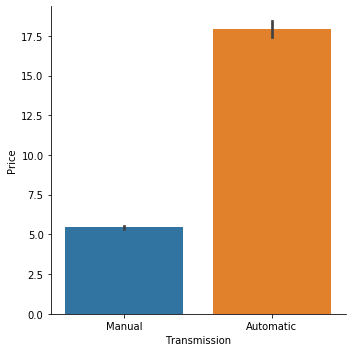

In [27]:
sns.catplot(x="Transmission", y="Price", kind="bar", data=data)

**Price of automated transmission is higher than manual, again for obvious reasons**

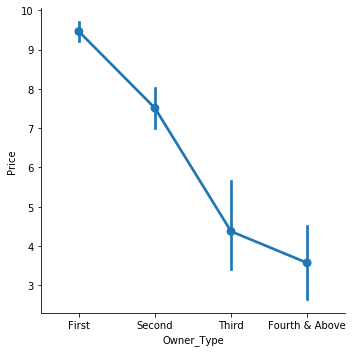

In [28]:
a=sns.catplot(x="Owner_Type", y="Price", kind="point", data=data,order=['First','Second','Third','Fourth & Above'])
a

**So, lower the no. of times the car has been bought, higher the praise, as implied**<br> 

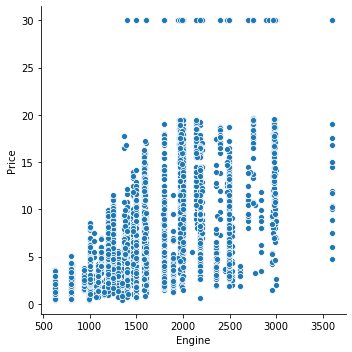

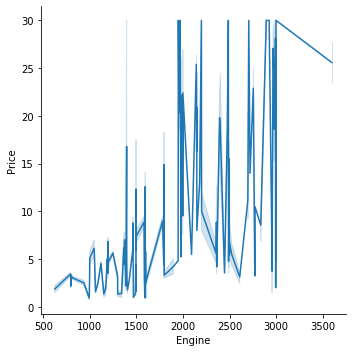

In [29]:
sns.relplot(x='Engine',y='Price',data=data,kind='scatter')
sns.relplot(x='Engine',y='Price',data=data,kind='line')

**The dots are not perfectly forming a pattern, but more or less, it seems more the capacity of the engine, more price of the car.**

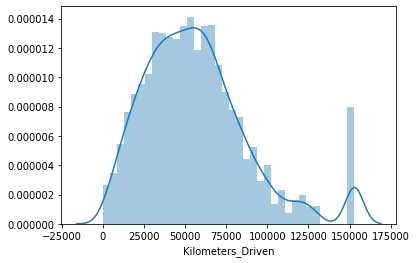

In [30]:
sns.distplot(data["Kilometers_Driven"])

In [31]:
data.Location.value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

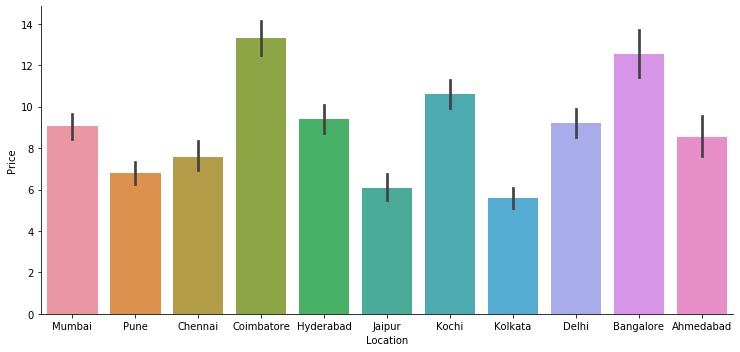

In [32]:
a=sns.catplot(x="Location", y="Price", kind="bar", data=data)
a.fig.set_figwidth(12)
a.fig.set_figheight(5)


**The preference of the cars seems to vary from city to city. Also in cities like Coimbatore, Bangalore, 7 seaters are preferred and seven seaters are sure a bit costlier**

In [33]:
data.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,0.512684,-0.287826,0.067942,-0.019287,-0.006873,-0.325440
Kilometers_Driven,0.512684,1.000000,-0.147014,0.188482,0.019695,0.232616,-0.171960
Mileage,-0.287826,-0.147014,1.000000,-0.644034,-0.552527,-0.330161,-0.363456
Engine,0.067942,0.188482,-0.644034,1.000000,0.860122,0.426556,0.678437
Power,-0.019287,0.019695,-0.552527,0.860122,1.000000,0.140161,0.795380
Seats,-0.006873,0.232616,-0.330161,0.426556,0.140161,1.000000,0.106004
Price,-0.325440,-0.171960,-0.363456,0.678437,0.795380,0.106004,1.000000


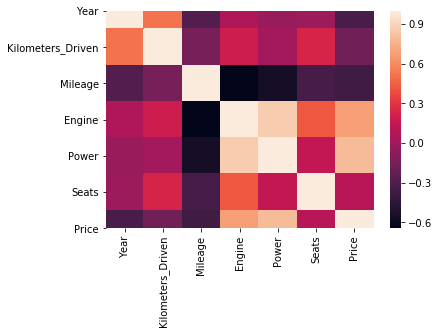

In [34]:
sns.heatmap(data.corr())

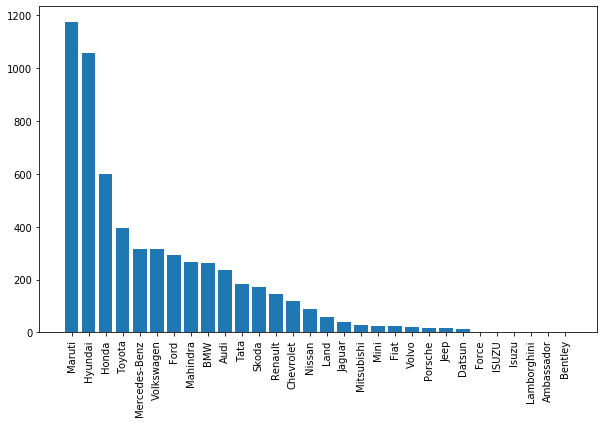

In [35]:
#histogram 
a=data['Brand'].value_counts()
plt.figure(figsize=(10,6))
a=plt.bar(a.index,a)
a=plt.xticks(rotation=90)



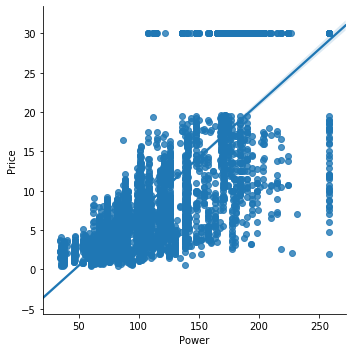

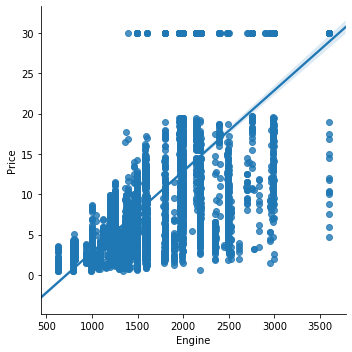

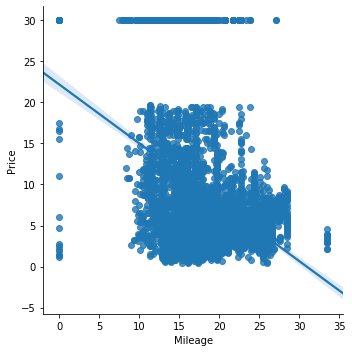

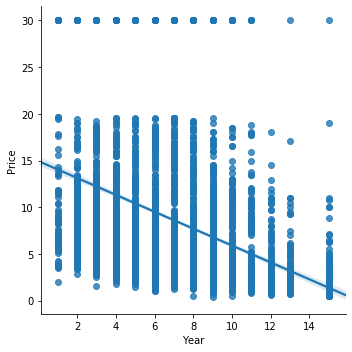

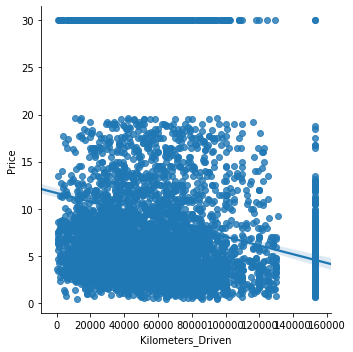

In [36]:
col=['Power','Engine','Mileage','Year','Kilometers_Driven']
for i in col: 
    sns.lmplot(y='Price',x='{}'.format(i),data=data)
    plt.show()

## Model Implementation:

In [38]:
le=LabelEncoder()

data['Brand']=le.fit_transform(data['Brand']).astype(float)
data['Location']=le.fit_transform(data['Location']).astype(float)
data['Fuel_Type']=le.fit_transform(data['Fuel_Type']).astype(float)
data['Transmission']=le.fit_transform(data['Transmission']).astype(float)
data['Owner_Type']=le.fit_transform(data['Owner_Type']).astype(float)
data['Model']=le.fit_transform(data['Model']).astype(float)
data['Engine']=data['Engine'].astype(float)
data['Power']=data['Power'].astype(float)

data.head()


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,9.0,10.0,72000.0,0.0,1.0,0.0,26.60,998.0,58.16,5.0,1.75,18.0,1579.0
1,10.0,5.0,41000.0,1.0,1.0,0.0,19.67,1582.0,126.20,5.0,12.50,10.0,450.0
2,2.0,9.0,46000.0,3.0,1.0,0.0,18.20,1199.0,88.70,5.0,4.50,9.0,889.0
3,2.0,8.0,87000.0,1.0,1.0,0.0,20.77,1248.0,88.76,7.0,6.00,18.0,606.0
4,3.0,7.0,40670.0,1.0,0.0,2.0,15.20,1968.0,140.80,5.0,17.74,1.0,93.0


In [39]:

y=data["Price"]
data.drop(columns=["Price"],inplace=True)
col=data.columns
rbst=RobustScaler()
df=pd.DataFrame(rbst.fit_transform(data),columns=col)

In [40]:

xtrain,xtest,ytrain,ytest=train_test_split(df,y,test_size=0.3)
xtrain=xtrain.astype(np.float64)
ytrain=ytrain.astype(np.float64)
xtest=xtest.astype(np.float64)
ytest=ytest.astype(np.float64)

0.7679751694026022
linreg accuracy
0.7757391816206806


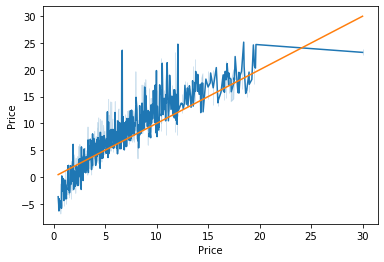

In [41]:
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)
pred=linreg.predict(xtest)
print(r2_score(ytest,pred))
print('linreg accuracy')
s1=cross_val_score(linreg,xtrain,ytrain,cv=12)
print(s1.mean())
p1=sns.lineplot(ytest,pred)
p1=sns.lineplot(ytest,ytest)

0.8837801414130353
knn accuracy
0.8864137220590845


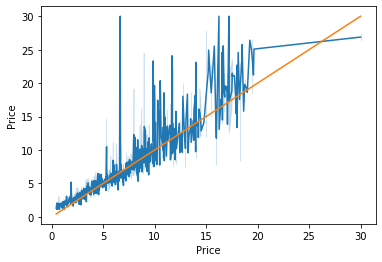

In [42]:
model=KNeighborsRegressor(n_neighbors=7);
model.fit(xtrain,ytrain);
knn=model.predict(xtest)
print(r2_score(ytest,knn))
print('knn accuracy')
s2=cross_val_score(model,xtrain,ytrain,cv=12)
print(s2.mean())
p2=sns.lineplot(ytest,knn)
p2=sns.lineplot(ytest,ytest)

0.8994684076892844
svr accuracy
0.8989520723915388


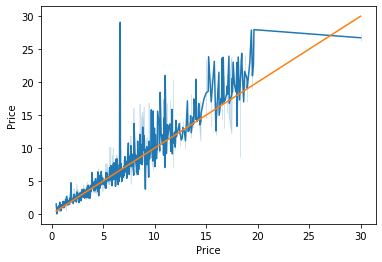

In [43]:
sup=SVR(C=100)
svr=sup.fit(xtrain,ytrain).predict(xtest)
print(r2_score(ytest,svr))
print('svr accuracy')
s3=cross_val_score(sup,xtrain,ytrain,cv=10)
print(s3.mean())
p3=sns.lineplot(ytest,svr)
p3=sns.lineplot(ytest,ytest)

0.83715472988775
dtr accuracy
0.8499031112097153


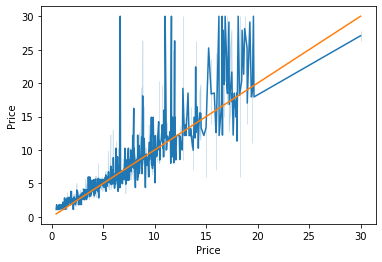

In [44]:
dtree = DecisionTreeRegressor(max_depth=8)
dtr=dtree.fit(xtrain, ytrain).predict(xtest)
print(r2_score(ytest,dtr))
print('dtr accuracy')
s4=cross_val_score(dtree,xtrain,ytrain,cv=10)
print(s4.mean())
p4=sns.lineplot(ytest,dtr)
p4=sns.lineplot(ytest,ytest)

0.9101889625742624
xgb accuracy
0.9246524146357403


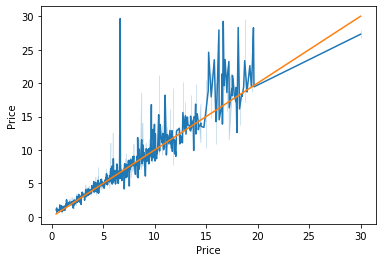

In [45]:
xgb_model=xgb.XGBRegressor(objective='reg:linear',max_depth=8,random_state=42,silent=True)
xgb_pred=xgb_model.fit(xtrain,ytrain).predict(xtest)
print(r2_score(ytest,xgb_pred))
print('xgb accuracy')
s5=cross_val_score(xgb_model,xtrain,ytrain,cv=8)
print(s5.mean())

p5=sns.lineplot(ytest,xgb_pred)
p5=sns.lineplot(ytest,ytest)

0.9069834410793003
rfr accuracy
0.914726781353768


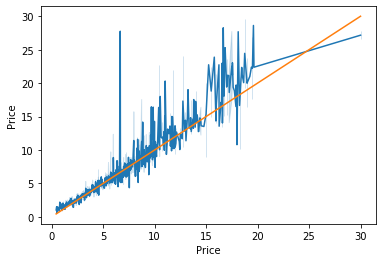

In [46]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 35, random_state = 0)
rfr=regressor.fit(xtrain, ytrain).predict(xtest)
print(r2_score(ytest,rfr))
print('rfr accuracy')
s4=cross_val_score(regressor,xtrain,ytrain,cv=10)
print(s4.mean())
p4=sns.lineplot(ytest,rfr)
p4=sns.lineplot(ytest,ytest)


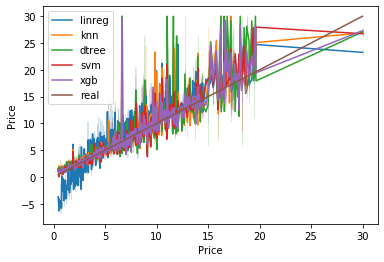

In [47]:
v1=sns.lineplot(ytest,pred)
v1=sns.lineplot(ytest,knn)
v1=sns.lineplot(ytest,dtr)
v1=sns.lineplot(ytest,svr)
v1=sns.lineplot(ytest,xgb_pred)
v1=sns.lineplot(ytest,ytest)
v1.legend(['linreg','knn','dtree','svm','xgb','real'])

# Data_Train


In [48]:
dt2=pd.read_excel("Data_test.xlsx")

dt2.shape

(1234, 11)

In [49]:
temp = dt2["Name"].str.split(" ", n = 1, expand = True)
dt2['Brand']=temp[0]
dt2['Model']=temp[1]
dt2['Engine']=dt2.Engine.str.split(" ").str[0]
dt2['Power']=dt2.Power.str.split(" ").str[0]
dt2['Mileage']=dt2.Mileage.str.split(" ").str[0]
dt2['Year']=np.subtract(2020,dt2['Year'])


In [50]:
dt2['Power'].replace('null ',float('NaN'),inplace=True)
dt2['Power'].replace('null',float('NaN'),inplace=True)
dt2.dropna(subset=['Mileage','Power','Engine','Seats'],inplace=True)


In [51]:
dt2.drop(columns=['Name'],inplace=True)

In [52]:
dt2.dropna(how="all",inplace=True)
dt2['Power']=dt2['Power'].astype(float)
dt2['Mileage']=dt2['Mileage'].astype(float)
dt2['Engine']=dt2['Engine'].astype(float)
dt2['Year']=dt2['Year'].astype(float)
dt2['Kilometers_Driven']=dt2['Kilometers_Driven'].astype(float)


In [53]:
dt2['Brand']=le.fit_transform(dt2['Brand']).astype(float)
dt2['Location']=le.fit_transform(dt2['Location']).astype(float)
dt2['Fuel_Type']=le.fit_transform(dt2['Fuel_Type']).astype(float)
dt2['Transmission']=le.fit_transform(dt2['Transmission']).astype(float)
dt2['Owner_Type']=le.fit_transform(dt2['Owner_Type']).astype(float)
dt2['Model']=le.fit_transform(dt2['Model']).astype(float)
dt2['Engine']=dt2['Engine'].astype(float)
dt2['Power']=dt2['Power'].astype(float)
#dt2.drop('Mileage',axis=1,inplace=True)
#dt2.drop('Name',axis=1,inplace=True)
dt2.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model
0,4.0,6.0,40929.0,0.0,1.0,0.0,32.26,998.0,58.20,4.0,15.0,69.0
1,3.0,7.0,54493.0,3.0,1.0,2.0,24.70,796.0,47.30,5.0,15.0,64.0
2,9.0,3.0,34000.0,1.0,1.0,0.0,13.68,2393.0,147.80,7.0,25.0,389.0
4,9.0,6.0,29000.0,3.0,1.0,0.0,18.50,1197.0,82.85,5.0,8.0,737.0
5,3.0,4.0,85609.0,1.0,1.0,2.0,16.00,2179.0,140.00,7.0,14.0,681.0


In [54]:
data2=pd.DataFrame(rbst.fit_transform(dt2),columns=col)

In [55]:
predicted=pd.DataFrame(xgb_model.predict(data2))
print(predicted)

              0
0      2.966205
1      3.727250
2     19.958210
3      4.812332
4     11.173597
...         ...
1196   6.093372
1197   7.871423
1198   2.531236
1199   8.888322
1200  22.834713

[1201 rows x 1 columns]


In [56]:
predicted.to_excel (r'predicted_ans2.xlsx', index = True, header=True)

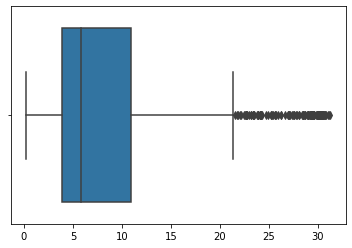

In [57]:
sns.boxplot(predicted)

### END